In [541]:
#Elijah Chanakira & Zeshawn Manzoor

import pandas as pd
import seaborn as sns

salaries = pd.read_excel("levels_comp.xlsx")

salaries = salaries.drop([0,1,2,3])
salaries = salaries.drop(columns=['Other details', 'Tag', 'Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17'])

salaries.head(10)

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
4,2017-06-07 11:33:27.260000,Oracle,L3,Product Manager,127,"Redwood City, CA",1.5,1.5,107,20,10,NaN
5,2017-06-10 17:11:29.485000,eBay,SE 2,Software Engineer,100,"San Francisco, CA",5,3,NaN,NaN,NaN,NaN
6,2017-06-11 14:53:56.571000,Amazon,L7,Product Manager,310,"Seattle, WA",8,0,155,NaN,NaN,NaN
7,2017-06-13 05:35:36.376000,Uber,Senior,Software Engineer,578,Sf,10,2,180000,1550000,9000,NaN
8,2017-06-14 21:22:24.609000,Microsoft,64,Software Engineering Manager,200,"Redmknd,WA",9,9,169000,100000,30000,NaN
9,2017-06-16 10:44:01.099000,Amazon,L5,Software Engineer,173,"Vancouver, BC, Canada",11,1,120000,NaN,53000,NaN
10,2017-06-17 00:23:13.709000,Apple,M1,Software Engineering Manager,372,Sunnyvale,7,5,157,180,35,NaN
11,2017-06-18 23:37:20.592000,Facebook,E4,Software Engineer,270,"Menlo Park, CA",3.5,2,160,NaN,NaN,NaN
12,2017-06-20 10:58:51.061000,Microsoft,60,Software Engineer,157,"Mountain View, CA",5,3,NaN,NaN,NaN,NaN
13,2017-06-20 18:49:58.669000,Amazon,L5,Software Engineer,190,"Seattle, WA",3,3,110000,80000,NaN,NaN


# Data Cleansing
- Clean Locations, Shares, and other random variables (Address how the salaries might vary due to shares)
- Drop comments
- Add Total Comp Column (Exlcuding Shares)

In [542]:
#  Create Total Compensation
salaries['Base Salary'].fillna(0, inplace=True)
salaries['Stock Grant Value'].fillna(0, inplace=True)
salaries['Bonus'].fillna(0, inplace=True)
salaries['Years of Experience'].fillna(0, inplace=True)
salaries['Years at Company'].fillna(0, inplace=True)

# Fix String Cases, so that I can do analysis by company
salaries['Company'] = salaries['Company'].str.lower()
salaries['Company'] = salaries['Company'].str.strip()

salaries['Location'] = salaries['Location'].str.lower()
salaries['Location'] = salaries['Location'].str.strip()

salaries['Title'] = salaries['Title'].str.lower()
salaries['Title'] = salaries['Title'].str.strip()


# Strip Timestamps
print(salaries['Location'].value_counts())

salaries.head(5)

seattle, wa                                  504
san francisco, ca                            402
seattle                                      323
redmond, wa                                  240
san francisco                                184
mountain view, ca                            149
new york, ny                                 130
sunnyvale, ca                                129
san jose, ca                                 108
cupertino, ca                                102
redmond                                       96
menlo park, ca                                82
sunnyvale                                     76
mountain view                                 70
palo alto, ca                                 65
bellevue, wa                                  56
san diego, ca                                 55
san jose                                      48
boston, ma                                    47
santa clara, ca                               42
new york            

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
4,2017-06-07 11:33:27.260000,oracle,L3,product manager,127,"redwood city, ca",1.5,1.5,107.0,20.0,10.0,NaN
5,2017-06-10 17:11:29.485000,ebay,SE 2,software engineer,100,"san francisco, ca",5,3.0,0.0,0.0,0.0,NaN
6,2017-06-11 14:53:56.571000,amazon,L7,product manager,310,"seattle, wa",8,0.0,155.0,0.0,0.0,NaN
7,2017-06-13 05:35:36.376000,uber,Senior,software engineer,578,sf,10,2.0,180000.0,1550000.0,9000.0,NaN
8,2017-06-14 21:22:24.609000,microsoft,64,software engineering manager,200,"redmknd,wa",9,9.0,169000.0,100000.0,30000.0,NaN


# Data Analysis
- Salary based on location, years of experience, company
- Percent difference between ranks
- Possibly set premade ranks based on years of experience
- Analyze salary by gender

In [543]:
# Average salary based on location
locFrame = (salaries.groupby(['Location', 'Base Salary'], as_index=False).mean().groupby('Location')['Base Salary'].mean().round().reset_index())
locFrame = locFrame.sort_values('Base Salary', ascending = False)
locFrame.head()

# The highest recorded average base salary comes from Tokyo, Japan, with a average base salary of almost twice the size of its runner up, San Fransisco. This data does not take into account the mispelled locations that skew the average base salary. 

,Location,Base Salary
431,"tokyo, japan",3250049.0
369,"sand francisco, ca",1750000.0
142,"hillsboro, or",333442.0
222,"mountain view , ca",275000.0
444,united states,220000.0


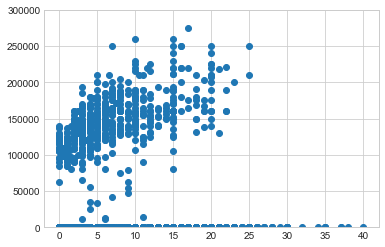

In [544]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Average salary based on years of experience
yoeFrame = (salaries.groupby(['Years of Experience', 'Base Salary'], as_index=False).mean().groupby('Years of Experience')['Base Salary'].mean().round().reset_index())
yoeFrame = yoeFrame.sort_values('Base Salary', ascending = False)
plt.scatter(salaries['Years of Experience'],salaries['Base Salary'])
plt.ylim(0,300000)
plt.show()

# The data projects that the highest average base salary comes from people with 22 years of experience for a salary of ~$285k. Meanwhile, workers with only 2 years of experience were projected to recieve ~$130k as a base salary, which is almost half the salary of someone with 22 years of experience. 
# The scatter plot created shows an upward trend. As years of experience increases, we can see that average base salary does as well.

In [545]:
# Average Salary based on company
companyFrame = (salaries.groupby(['Company', 'Base Salary'], as_index=False).mean().groupby('Company')['Base Salary'].mean().round().reset_index())
companyFrame = companyFrame.sort_values('Base Salary', ascending = False)
companyFrame.head()

# Squarespace has by far the largest average base salary of ~600k per year. Followed up is ey with only half that amount. Interestingly, the 5th highest average base salary from oracle oci is three times smaller than that of squarespace. 

,Company,Base Salary
440,squarespace,594047.0
160,ey,250000.0
201,google cloud,220000.0
225,hon,212000.0
352,oracle oci,190000.0


In [546]:
# Analyze Salary by Gender
genderFrame = (salaries.groupby(['Gender', 'Base Salary'], as_index=False).mean().groupby('Gender')['Base Salary'].mean().round().reset_index())
genderFrame
# According to the data: On average, men's base salaries were almost twice as much as women's base salaries. However, The unspecified gender category could either skew the average base salary towards women or towards men.

,Gender,Base Salary
0,Female,51263.0
1,Male,100365.0
2,Other,133.0


In [547]:
rankFrame = (salaries.groupby(['Level','Years of Experience'])[['Base Salary']]).mean()
rankFrame

Base Salary
Level                       Years of Experience               
1                           0.0                      60.000000
                            1.0                      45.000000
                            2.0                      88.000000
                            3.0                  140000.000000
                            5.0                     100.000000
2                           1.0                   14354.333333
                            2.0                      62.333333
                            3.0                   39425.000000
                            4.0                     139.500000
                            5.0                  145000.000000
                            8.0                       0.000000
                            10.0                      0.000000
3                           2.0                      90.000000
                            2.5                     122.000000
                            3.0                       0.000000
                            4.0                      72.800000
                            5.0                     149.500000
                            6.0                   32500.000000
                            7.0                     165.000000
                            9.0                     100.000000
                            10.0                    120.000000
4                           0.0                     100.000000
                            2.0                  150000.000000
                            3.0                  168000.000000
                            4.0                      77.500000
                            5.0                      95.000000
                            6.0                   46800.000000
                            7.0                     135.000000
                            10.0                    133.333333
                            13.0                      0.000000
...                                                        ...
product                     10.0                    170.000000
sde2                        2.0                  130000.000000
                            3.0                       0.000000
se                          2.0                       0.000000
senior                      3.0                       0.000000
                            4.0                   55000.000000
                            10.0                    160.000000
                            11.0                    182.000000
                            20.0                      0.000000
                            40.0                    176.000000
senior                      7.5                     168.200000
senior associate            1.0                     115.000000
senior engineer             5.0                     120.000000
senior software engineer    6.0                     170.000000
                            7.0                  165000.000000
senior software engineer II 12.0                    161.000000
senior staff                12.0                    171.000000
                            19.0                 167000.000000
                            20.0                 140000.000000
software developer          2.0                  110000.000000
                            10.0                     20.000000
software engineer           6.0                  167500.000000
software senior engineer    6.0                       0.000000
sr director                 20.0                      0.000000
                            25.0                      0.000000
staff engineer              6.0                     130.000000
swe1                        0.0                     105.000000
vice president              7.5                     120.000000
zen2                        3.0                      70.000000
⁴                           2.0                       0.000000

[1770 rows x 1 columns]

# Machine Learning
- Salary increase based on rank over time
- Salary predictor
- Rank based on years of experience